In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumGothicCoding')
sns.set(font='NanumGothicCoding')

In [3]:
attendance = pd.read_csv('K_Leauge_1_2024_Attendance.csv')
stats = pd.read_csv('Stats.csv')

In [4]:
attendance

,Matchday,Home,Away,Month,Day,Date of the week,Attendance
0,1,Ulsan HD FC,Pohang Steelers,3,1,Fri,28683
1,1,Jeonbuk Hyundai Motors,Daejeon Hana Citizen,3,1,Fri,24758
2,1,Incheon United,Suwon FC,3,2,Sat,15060
3,1,Gangwon FC,Jeju SK,3,2,Sat,6021
4,1,Gwangju FC,FC Seoul,3,2,Sat,7805
...,...,...,...,...,...,...,...
223,38,Gangwon FC,Pohang Steelers,11,23,Sat,11426
224,38,Gimcheon Sangmu,FC Seoul,11,23,Sat,5943
225,38,Daegu FC,Incheon United,11,24,Sun,11812
226,38,Daejeon Hana Citizen,Jeju SK,11,24,Sun,12743


In [5]:
stats

,Player,Month,Day,Goal,Assist
0,Son,3,2,1,0
1,Son,3,10,1,2
2,Son,3,16,0,0
3,Son,3,21,1,0
4,Son,3,26,1,0
...,...,...,...,...,...
70,Lee,10,28,0,0
71,Lee,11,3,0,0
72,Lee,11,7,0,0
73,Lee,11,10,2,1


In [ ]:
attendance_stats = pd.DataFrame({'총관중 수':attendance.groupby(by=['Month'])['Attendance'].sum(), '평균 관중수':attendance.groupby(['Month'])['Attendance'].mean()})
stats_sum = pd.DataFrame({'Goals':stats.groupby(by=['Month']).sum()['Goal'], 'Assists':stats.groupby(by=['Month']).sum()['Assist']})
stats_sum['Total_stats'] = stats_sum['Goals']+stats_sum['Assists']

In [7]:
attendance_stats

,총 관중수,평균 관중수
Month,,
3,341811,14242.125000
4,297509,9597.064516
5,346383,9896.657143
6,297609,9920.300000
7,286850,9561.666667
8,247202,11771.523810
9,260660,12412.380952
10,182998,10166.555556
11,247519,13751.055556


### 주요 사항
<b>언론 노출도를 고려해 유명 선수들의 스탯만 수집</b><br>
손흥민, 황희찬, 이강인 선수의 데이터를 수집<br>
김민재도 인지도는 충분하나 수비수 특성상 스탯 비교가 힘들 것 같아 제외<br>

<b>고려할 점</b><br>
6월부터 8월까지는 유럽 축구가 휴식기에 돌입하므로 이점을 고려해서 봐야 할 것 같음<br>
어떤 팀들 간의 경기가 펼쳐지는지도 매우 중요<br>
K리그에서 평균 관중 수가 높은 인기 팀(FC 서울, 울산 HD FC, 전북 현대 모터스)의 경기 일정 고려<br>
K리그에서 관심도가 높은 매치(울산 vs 전북, 울산 vs 포항, 서울 vs 인천 등이 언제 있는지 고려)<br>
경기장마다 수용인원이 다르기 때문에 어느 경기장에서 경기가 펼쳐지는지도 중요(같은 매치업이라도 경기장에 따라 인원수의 차이가 극명하게 날 수 있음)<br>
9월, 10월, 11월에는 A매치(국가대표) 경기가 진행<br>
유럽파 선수 스탯 수집한 75 경기 중 25경기에서 골 or 어시스트 기록<br>

### 유럽파 선수들 월별 활약상
|월|골|도움| 총합 |
|---|---|---|---|
|**3**|6|3|9|
|**4**|2|2|4|
|**5**|3|2|5|
|**8**|4|0|4|
|**9**|1|2|3|
|**10**|2|0|2|
|**11**|2|3|5|

3월을 제외하면 비슷비슷하게 활약함

이외에도 이강인이 소속된 PSG가 4월에는 UEFA 챔피언스리그 4강 진출, 5월에는 쿠프 드 프랑스 우승을 달성

Text(0.5, 1.0, '월별 총 관중 수 그래프')

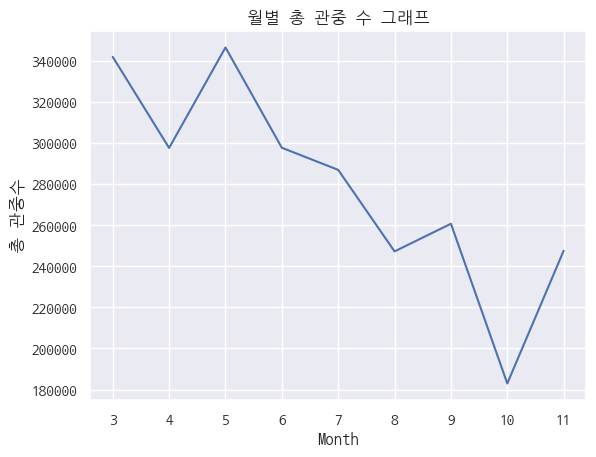

In [ ]:
sns.lineplot(attendance_stats['총관중 수']).set_title("월별 총관중 수 그래프")

Text(0.5, 1.0, '월별 평균 관중 수 그래프')

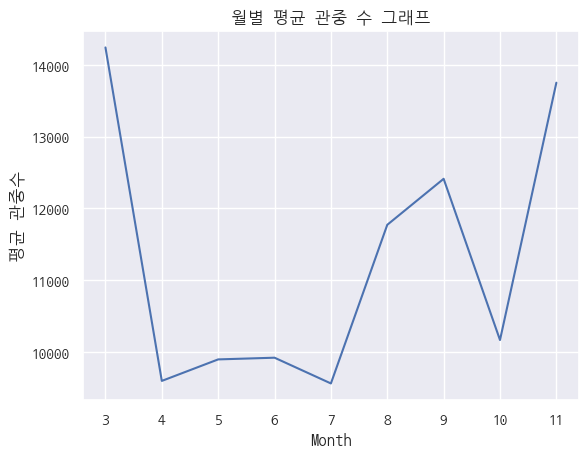

In [9]:
sns.lineplot(attendance_stats['평균 관중수']).set_title("월별 평균 관중 수 그래프")

Text(0.5, 1.0, '월별 경기 수')

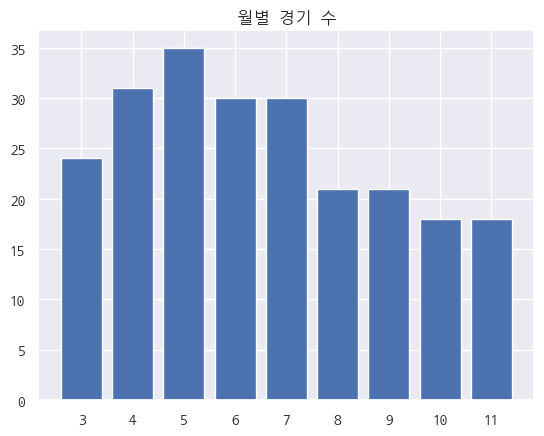

In [11]:
plt.bar(['3','4','5','6','7','8','9','10','11'], attendance['Month'].value_counts().sort_index())
plt.title('월별 경기 수')

### 월별 통계
<b>3월</b><br>
평균 관중 수가 가장 높음<br>
유럽파 선수들의 스탯도 가장 좋음<br>
3월은 개막 시즌이기도 하고 울산vs포항, 서울vs인천, 울산vs전북 등 인기 팀들의 더비매치가 많음<br>

<b>4월</b><br>
4월부터 7월까지 평균 관중 수가 매우 낮음<br>
4월, 5월에는 경기수가 많아 총관중수는 많이 집계<br>
개막 후 관심도 하락과 빅매치의 부재로 평균 관중 수가 낮아진 것 같음<br>

<b>5월</b><br>
총관중 수가 가장 높음<br>
평균 관중 수는 높지 않으나 경기가 가장 많은 기간이라 총관중 수는 높은 것 같음<br>

<b>6월~7월</b><br>
유럽 축구 휴식 기간<br>

<b>8월~9월</b><br>
8월부터 평균 관중 수 반등<br>
유럽 축구가 개막하는 시기에 평균 관중 수가 반등<br>
유럽 축구 개막으로 인한 유럽파 선수들의 언론 노출이 K리그 관중 수에 영향을 주는 것으로 볼 여지도 있을 것 같음<br>
총관중 수가 적은 건 경기 수 자체가 적어서 그런 것 같음<br>

<b>10월</b><br>
8, 9월 이후로 다시 평균 관중 수가 낮아짐<br>
10월에는 K리그에서 가장 관중 동원력이 좋은 팀인 FC서울의 홈경기가 한 경기도 없음<br>

<b>11월</b><br>
11월에는 총관중 수는 적지만 평균 관중 수는 3월 이후 가장 높음<br>
총관중 수가 적은 건 경기 수가 적어서 그런 것 같음<br>
시즌 말 우승 경쟁 & 강등 경쟁으로 인한 관심도 상승인 것 같음<br>

### 결론
유럽파 선수가 좋은 활약을 한 직후에도 관중 수에 큰 영향은 없음<br>
 → 유럽파 선수들의 활약과 K리그 관중 수에는 큰 영향이 없는 것 같음<br>
유럽 축구 개막 소식이 언론에 노출되는 8월부터 관중 수가 반등<br>
 → 활약보다는 언론 노출 자체에 영향을 받는 것 같음<br>
3월은 K리그 개막으로, 8월은 유럽 축구 소식의 언론 노출, 11월은 시즌 말 경쟁으로 축구에 대한 관심이 높아지는 것 같음<br>
K리그에 대한 관심도가 집중적으로 오르는 시기가 지나면 코어 팬들만 경기장을 찾는 것 같음<br>
이외에도 어떤 경기(더비 매치)가 어디서(주요 경기장 ex.상암, 빅크라운 등) 펼쳐지는지에 많은 영향을 받는 것 같음
K리그에 관심을 가지는 사람은 애초에 유럽 축구에 관심을 가지고 있을 확률이 높음<br>
→ 따라서 선수들의 활약 여부와 관계없이 애초에 둘을 모두 챙겨볼 수도 있음<br>
→ 결국 이 분석에서 가장 큰 영향을 미치는 요인은 축구에 관심이 없지도, 그리 많지도 않은 라이트 팬(뉴스에서 유럽 선수들의 활약상을 보고 주말 직관을 고민)인데 이 분포가 그리 크지 않은 것 같음<br>
→ 직관에 비해 상대적으로 라이트 팬의 비율이 더 높은 시청자 수라면 결과가 달라졌을 수 있을 것 같음